# ESTIMATION OF SOCIAL DISTANCING BASED ON ENVIRONMENTAL CONDITION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel('project_data.xlsx')
data

,time(s),distance (m),RH,wind speed(km/hr)
0,49.00,1.000,0.500,0
1,5.00,6.000,0.500,4
2,1.60,6.000,0.500,15
3,19.00,3.600,0.500,0
4,0.25,0.300,0.500,0
5,0.12,1.020,0.600,0
6,0.05,0.425,0.500,0
7,0.01,0.085,0.500,0
8,0.10,0.850,0.500,0
9,49.00,0.770,0.500,0


In [3]:
data.shape

(29, 4)

In [4]:
data.isnull().sum()

time(s)              1
distance (m)         0
RH                   0
wind speed(km/hr)    0
dtype: int64

In [5]:
data=data.rename(columns={"time(s)":"time","distance (m)":"distance","RH":"RH","wind speed(km/hr)":"wind"})

In [6]:
data.head()

,time,distance,RH,wind
0,49.00,1.0,0.5,0
1,5.00,6.0,0.5,4
2,1.60,6.0,0.5,15
3,19.00,3.6,0.5,0
4,0.25,0.3,0.5,0


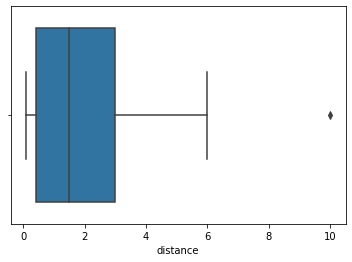

In [7]:
sns.boxplot(x=data["distance"])

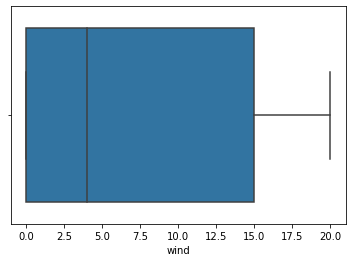

In [8]:
sns.boxplot(x=data["wind"])

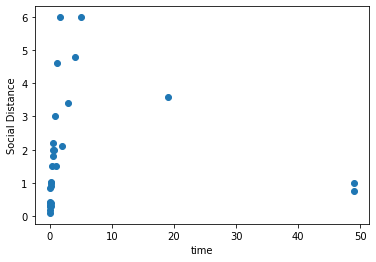

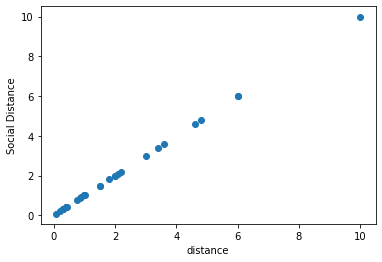

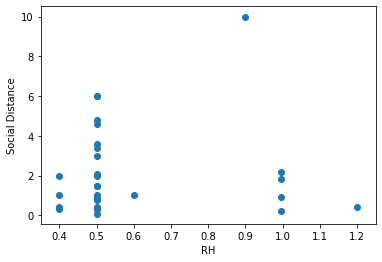

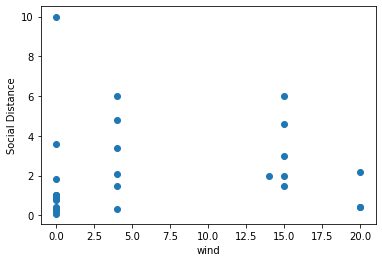

In [9]:
for feature in data.columns:
    plt.scatter(x=data[feature],y=data['distance'])
    plt.xlabel(feature)
    plt.ylabel('Social Distance')
    plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


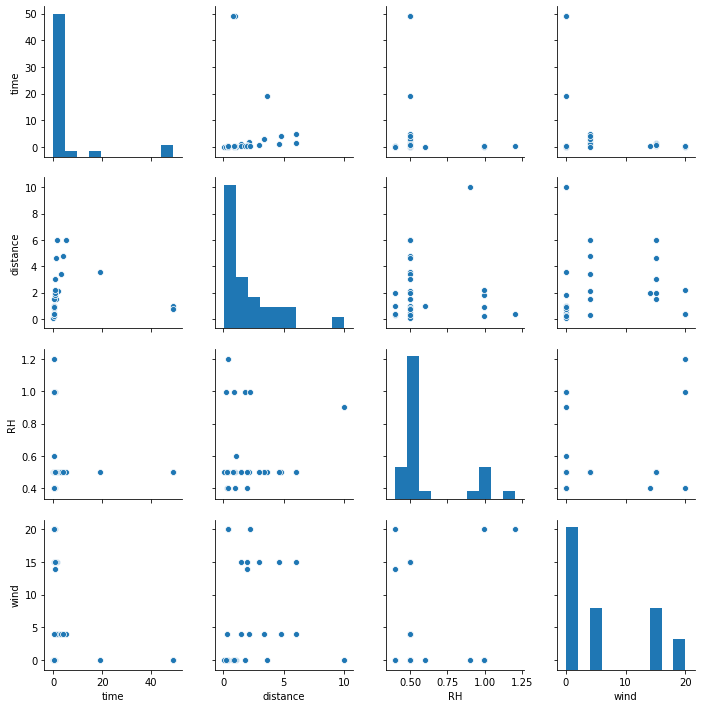

In [10]:
sns.pairplot(data)

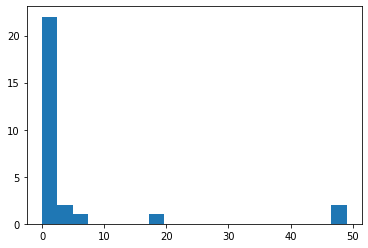

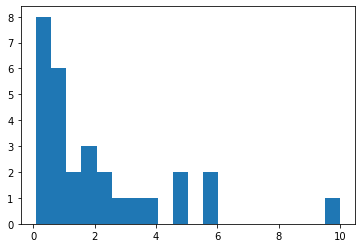

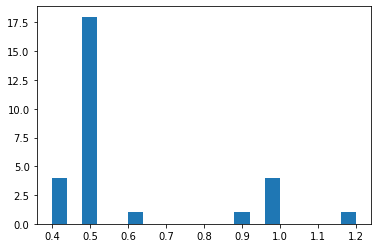

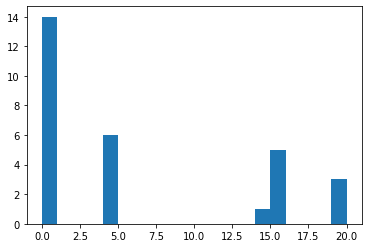

In [11]:
for feature in data.columns:
    plt.hist(x=data[feature],bins=20,label=feature)
    plt.show()

In [12]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
data.iloc[:,0:1]=imputer.fit_transform(data.iloc[:,0:1])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
data.isnull().sum()

time        0
distance    0
RH          0
wind        0
dtype: int64

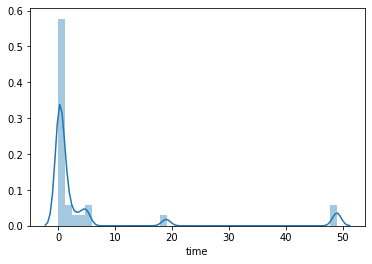

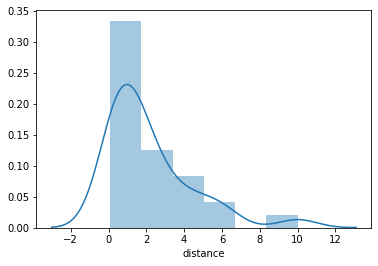

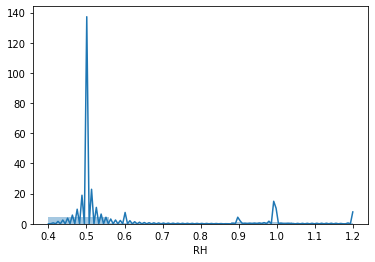

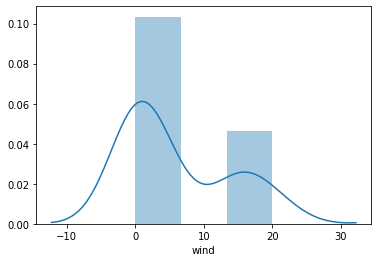

In [14]:
for feature in data.columns:
    sns.distplot(data[feature],kde=True)
    plt.show()

In [15]:
y_data=pd.DataFrame(data.loc[:,"distance"],columns=["distance"])


In [16]:
y_data

,distance
0,1.000
1,6.000
2,6.000
3,3.600
4,0.300
5,1.020
6,0.425
7,0.085
8,0.850
9,0.770


In [17]:
data.drop("distance",axis=1,inplace=True)

In [18]:
data.head()

,time,RH,wind
0,49.00,0.5,0
1,5.00,0.5,4
2,1.60,0.5,15
3,19.00,0.5,0
4,0.25,0.5,0


In [19]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
fit=mn.fit(data.iloc[:,:])
scaled_data=fit.transform(data.iloc[:,])

In [20]:
scaled_data=pd.DataFrame(scaled_data)
x=scaled_data.iloc[:,:]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y_data,test_size=0.2,random_state=0)

In [22]:
x_train

,0,1,2
27,0.001837,0.00000,1.00
26,0.004899,0.74375,0.00
5,0.002245,0.25000,0.00
14,0.001837,0.12500,0.20
8,0.001837,0.12500,0.00
16,0.016126,0.12500,0.75
22,0.010002,0.74375,1.00
17,0.024291,0.12500,0.75
1,0.101858,0.12500,0.20
10,0.040621,0.12500,0.20


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Implementing Linear Models

In [24]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred=lr.predict(x_test)

In [27]:
mse=print(np.mean((y_test-y_pred)**2))

distance    6.245775
dtype: float64


In [28]:
rscore=lr.score(x_test,y_test)
rscore

-0.2868710228593426

In [29]:
rscore=lr.score(x_train,y_train)
rscore

0.027344120127688942

In [30]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 2.1796802338052914
MSE: 6.245774889821867
RMSE: 2.499154835103633


In [31]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)


In [32]:
rscore=ridge.score(x_test,y_test)
rscore

-0.284772850720439

# Implementing Non-Linear models

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [34]:
randomforest=RandomForestRegressor()
decisiontree=DecisionTreeRegressor()

In [35]:
randomforest.fit(x_train,y_train)
decisiontree.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
ypredRF=randomforest.predict(x_test)
ypredDT=decisiontree.predict(x_test)

Decision TREE RESULTS

In [37]:
print('MAE:', mean_absolute_error(y_test,ypredDT))
print('MSE:', mean_squared_error(y_test, ypredDT))
print('RMSE:', np.sqrt(mean_squared_error(y_test,ypredDT)))

MAE: 1.3983333333333334
MSE: 3.3386833333333334
RMSE: 1.827206428768609


In [40]:
rscore=decisiontree.score(x_test,y_test)
rscore

0.31210219517011073

Random Forest

In [38]:
print('MAE:', mean_absolute_error(y_test,ypredRF))
print('MSE:', mean_squared_error(y_test, ypredRF))
print('RMSE:', np.sqrt(mean_squared_error(y_test,ypredRF)))

MAE: 1.1165
MSE: 2.0364212499999996
RMSE: 1.4270323226892934


In [42]:
rscore=randomforest.score(x_test,y_test)
rscore

0.5804185160066277

In [43]:
'''So here you can see that due to implementation of Non-linear Models like Decision Tree and RandomForest Regressor.
The results are quiet significantly improved and we were able to achieve a good result.
'''

'So here you can see that due to implementation of Non-linear Models like Decision Tree and RandomForest Regressor.\nThe results are quiet significantly improved and we were able to achieve a good result.\n'

# Socail Distancing based on size of Particle and velocity of Traversal

In [102]:
data1=pd.read_excel('project_data2.xlsx',names=["size","distance","velocity"])
data1

,size,distance,velocity
0,60.000,6.000000e+00,50.0
1,60.000,2.000000e+00,10.0
2,16.000,7.000000e+00,11.7
3,30.000,2.500000e+00,NaN
4,50.000,1.000000e+01,4.0
5,96.000,1.400000e+00,NaN
6,19.000,4.000000e+00,NaN
7,0.068,2.770000e-07,5.0
8,7.000,7.580000e-04,5.0
9,100.000,1.510000e-01,5.0


In [103]:
data1.isnull().sum()

size        0
distance    0
velocity    3
dtype: int64

In [107]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
data1.iloc[:,2:3]=imputer.fit_transform(data1.iloc[:,2:3])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [108]:
data1.isnull().sum()

size        0
distance    0
velocity    0
dtype: int64

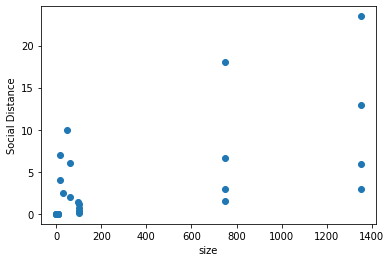

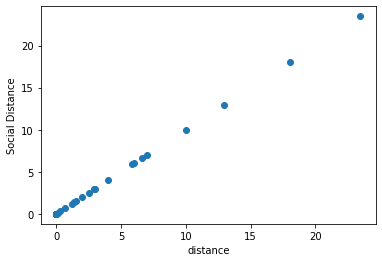

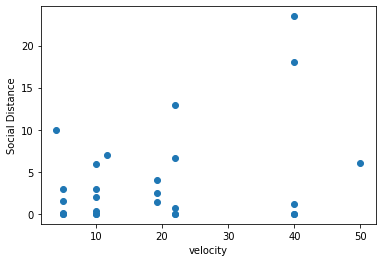

In [109]:
for feature in data.columns:
    plt.scatter(x=data[feature],y=data['distance'])
    plt.xlabel(feature)
    plt.ylabel('Social Distance')
    plt.show()

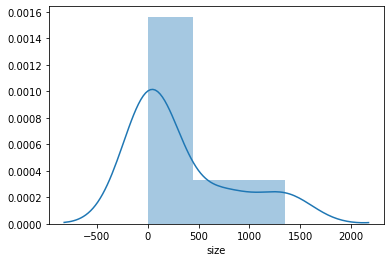

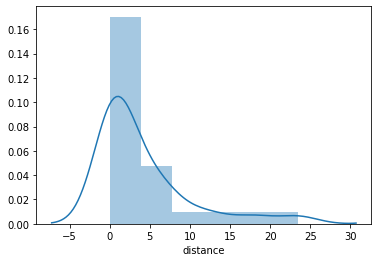

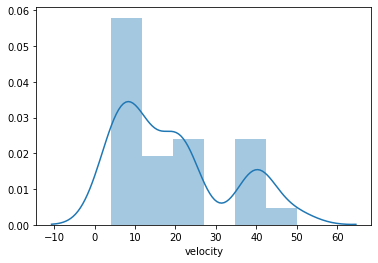

In [84]:
for feature in data.columns:
    sns.distplot(data[feature],kde=True)
    plt.show()

In [110]:
y=data1.loc[:,"distance"]
data1.drop("distance",axis=1,inplace=True)

In [111]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
fit=mn.fit(data1.iloc[:,:])
scaled_data=fit.transform(data1.iloc[:,])

In [112]:
scaled_data=pd.DataFrame(scaled_data)
x=scaled_data.iloc[:,:]

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=0)

In [114]:
x_train

,0,1
23,0.005135,0.782609
13,0.005135,0.130435
19,0.074027,0.391304
20,0.555533,0.391304
16,1.000000,0.130435
1,0.044396,0.130435
10,0.555533,0.021739
26,1.000000,0.782609
25,0.555533,0.782609
8,0.005135,0.021739


# Implementing Linear Models

In [115]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
y_pred=lr.predict(x_test)

In [117]:
mse=print(np.mean((y_test-y_pred)**2))

21.359792236231034


In [118]:
rscore=lr.score(x_test,y_test)
rscore

-2.8117265654790065

In [119]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 3.7141107023992195
MSE: 21.359792236231034
RMSE: 4.621665526217906


In [120]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)

In [121]:
rscore=ridge.score(x_test,y_test)
rscore

-2.7923369966146168

# Implementing Non-Linear Models

In [44]:
randomforest=RandomForestRegressor()
decisiontree=DecisionTreeRegressor()

In [45]:
randomforest.fit(x_train,y_train)
decisiontree.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
ypredRF=randomforest.predict(x_test)
ypredDT=decisiontree.predict(x_test)

Decision Tree Results

In [47]:
print('MAE:', mean_absolute_error(y_test,ypredDT))
print('MSE:', mean_squared_error(y_test, ypredDT))
print('RMSE:', np.sqrt(mean_squared_error(y_test,ypredDT)))

MAE: 1.4183333333333332
MSE: 3.3690833333333337
RMSE: 1.8355062880124746


In [48]:
rscore=decisiontree.score(x_test,y_test)
rscore

0.30583862022784436

Random Forest

In [50]:
print('MAE:', mean_absolute_error(y_test,ypredRF))
print('MSE:', mean_squared_error(y_test, ypredRF))
print('RMSE:', np.sqrt(mean_squared_error(y_test,ypredRF)))

MAE: 1.07875
MSE: 1.956300041666667
RMSE: 1.3986779621008787


In [51]:
rscore=randomforest.score(x_test,y_test)
rscore

0.5969265815612579

In [52]:
'''So here you can see that due to implementation of Non-linear Models like Decision Tree and RandomForest Regressor.
The results are quiet significantly improved and we were able to achieve a good result.
'''

'So here you can see that due to implementation of Non-linear Models like Decision Tree and RandomForest Regressor.\nThe results are quiet significantly improved and we were able to achieve a good result.\n'